Rafael Gayahan
RMG180000
CS4375.003
Professor Chen

### Modified LeNet with MNIST 2 Extra Convolutional Layers & 2 More Linear Layers

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


#getting sets and converting to tensor so that can send it to a torch data loader
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(mnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(X_train, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(mnist_testset, batch_size = 64, shuffle = True, num_workers = 2)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #additional convolutional layer 1
        nn.Conv2d(in_channels = 16, out_channels = 64, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #Last additional convolutional layer
        nn.Conv2d(in_channels = 64, out_channels = 120, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 1, stride = 2),

        nn.Flatten(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model

def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
        
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    

Epoch 1
Training loss: 0.275
Validation loss: 0.246
Testing loss: 0.148
Accuracy:  95.30000305175781 

Epoch 2
Training loss: 0.393
Validation loss: 0.162
Testing loss: 0.097
Accuracy:  97.0199966430664 

Epoch 3
Training loss: 0.480
Validation loss: 0.142
Testing loss: 0.085
Accuracy:  97.41999816894531 

Epoch 4
Training loss: 0.555
Validation loss: 0.124
Testing loss: 0.073
Accuracy:  97.6500015258789 

Epoch 5
Training loss: 0.618
Validation loss: 0.129
Testing loss: 0.078
Accuracy:  97.48999786376953 

Epoch 6
Training loss: 0.674
Validation loss: 0.123
Testing loss: 0.073
Accuracy:  97.77999877929688 

Epoch 7
Training loss: 0.725
Validation loss: 0.111
Testing loss: 0.066
Accuracy:  97.97000122070312 

Epoch 8
Training loss: 0.770
Validation loss: 0.108
Testing loss: 0.065
Accuracy:  98.08999633789062 

Epoch 9
Training loss: 0.813
Validation loss: 0.105
Testing loss: 0.062
Accuracy:  98.02999877929688 

Epoch 10
Training loss: 0.854
Validation loss: 0.102
Testing loss: 0.061
Ac

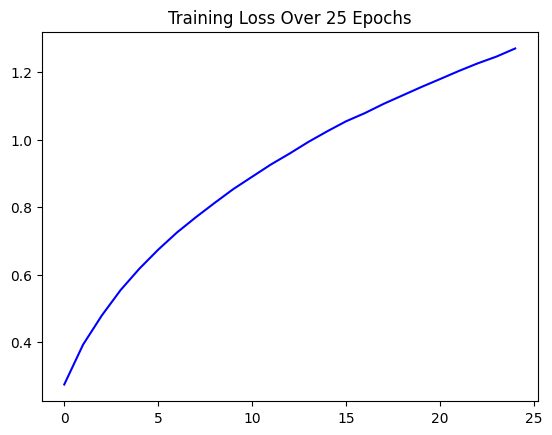

In [2]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

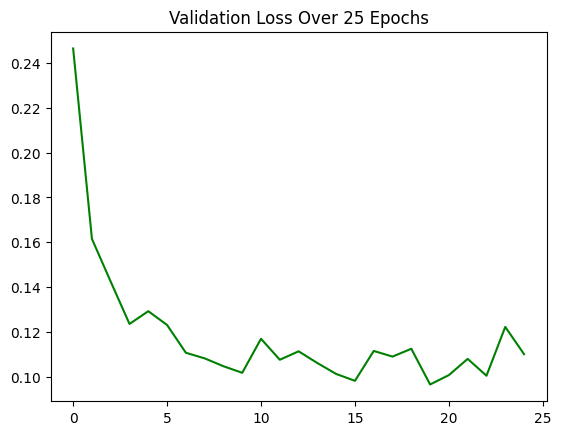

In [3]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

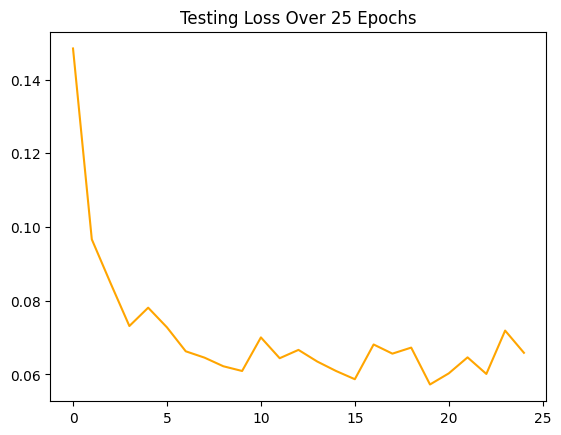

In [4]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

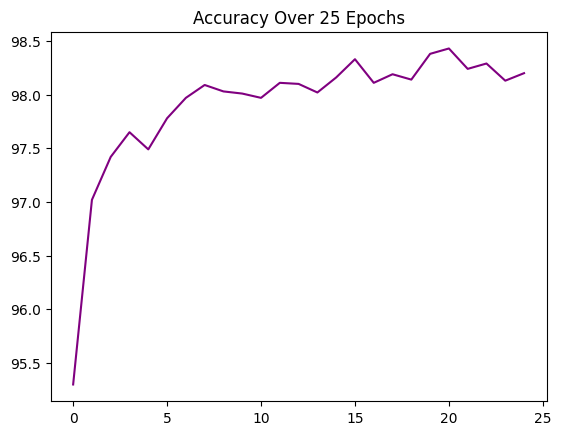

In [5]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Modified LeNet with Fashion MNIST

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

#getting sets and converting to tensor so that can send it to a torch data loader
Fmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
Fmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(Fmnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(Fmnist_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(Fmnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #additional convolutional layer 1
        nn.Conv2d(in_channels = 16, out_channels = 64, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #Last additional convolutional layer
        nn.Conv2d(in_channels = 64, out_channels = 120, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 1, stride = 2),

        nn.Flatten(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-05)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Epoch 1
Training loss: 2.028
Validation loss: 1.649
Testing loss: 1.643
Accuracy:  46.75 

Epoch 2
Training loss: 1.442
Validation loss: 1.312
Testing loss: 1.307
Accuracy:  56.65999984741211 

Epoch 3
Training loss: 1.213
Validation loss: 1.140
Testing loss: 1.136
Accuracy:  64.27999877929688 

Epoch 4
Training loss: 1.065
Validation loss: 1.012
Testing loss: 1.013
Accuracy:  67.29000091552734 

Epoch 5
Training loss: 0.958
Validation loss: 0.922
Testing loss: 0.931
Accuracy:  69.0 

Epoch 6
Training loss: 0.883
Validation loss: 0.859
Testing loss: 0.872
Accuracy:  70.30999755859375 

Epoch 7
Training loss: 0.831
Validation loss: 0.813
Testing loss: 0.824
Accuracy:  70.88999938964844 

Epoch 8
Training loss: 0.792
Validation loss: 0.778
Testing loss: 0.792
Accuracy:  71.45999908447266 

Epoch 9
Training loss: 0.762
Validation loss: 0.751
Testing loss: 0.770
Accuracy:  72.26000213623047 

Epoch 10
Training loss: 0.738
Validation loss: 0.728
Testing loss: 0.752
Accuracy:  72.63999938964

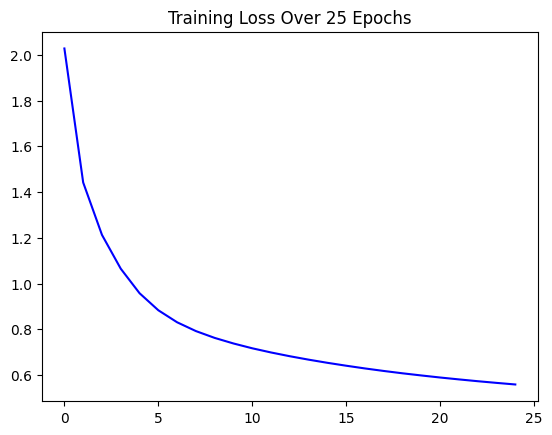

In [7]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

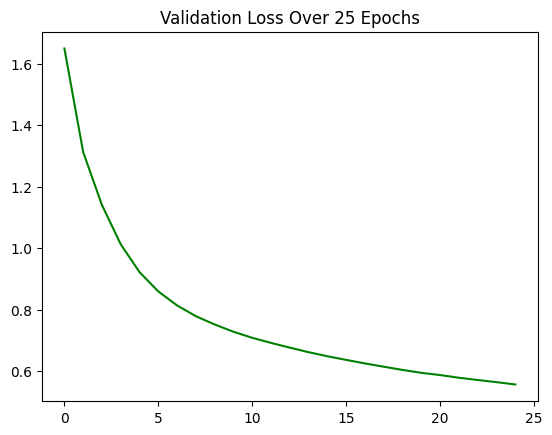

In [8]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

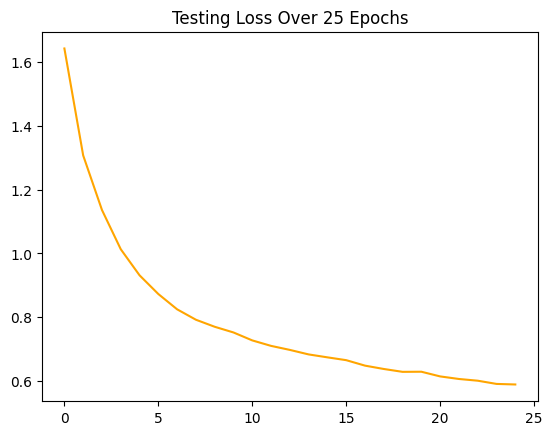

In [9]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

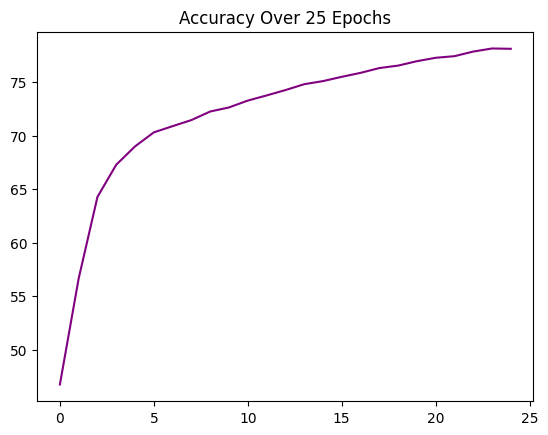

In [10]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Modified LeNet with CIFAR10

In [11]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 64, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #additional convolutional layer 1
        nn.Conv2d(in_channels = 16, out_channels = 64, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #Last additional convolutional layer
        nn.Conv2d(in_channels = 64, out_channels = 120, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 1, stride = 2),

        nn.Flatten(),
        nn.Linear(480, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.824
Validation loss: 1.637
Testing loss: 1.646
Accuracy:  40.470001220703125 

Epoch 2
Training loss: 1.567
Validation loss: 1.467
Testing loss: 1.490
Accuracy:  46.349998474121094 

Epoch 3
Training loss: 1.451
Validation loss: 1.397
Testing loss: 1.432
Accuracy:  48.689998626708984 

Epoch 4
Training loss: 1.378
Validation loss: 1.325
Testing loss: 1.395
Accuracy:  50.02000045776367 

Epoch 5
Training loss: 1.334
Validation loss: 1.271
Testing loss: 1.374
Accuracy:  50.9900016784668 

Epoch 6
Training loss: 1.290
Validation loss: 1.248
Testing loss: 1.366
Accuracy:  50.959999084472656 

Epoch 7
Training loss: 1.255
Validation loss: 1.228
Testing loss: 1.392
Accuracy:  51.209999084472656 

Epoch 8
Training loss: 1.225
Validation loss: 1.175
Testing loss: 1.339
Accuracy:  52.209999084472656 

Epoch 9
Training loss: 1.204
Validation loss: 1.193
Testing loss: 1.374
Accuracy:  51.119998931

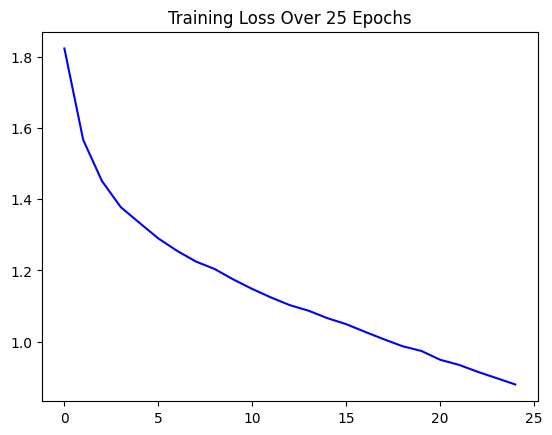

In [12]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

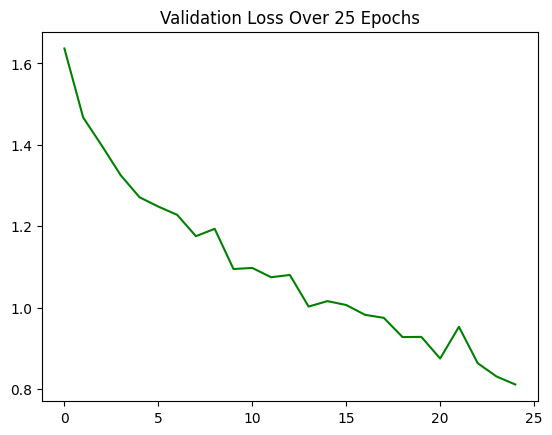

In [13]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

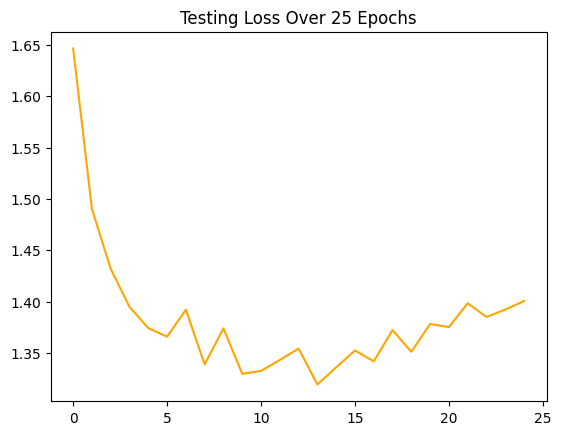

In [14]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

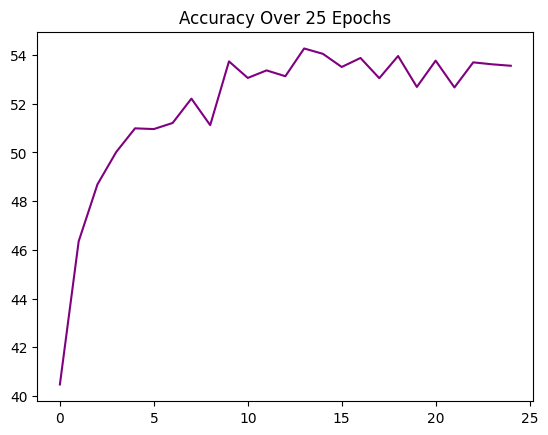

In [15]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### CIFAR10 Converting to Grayscale Before Running

In [16]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1), transforms.ToTensor()])

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#modified to have 2 more convolutional layers and removed one linear layer
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #additional convolutional layer 1
        nn.Conv2d(in_channels = 16, out_channels = 64, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        
        #Last additional convolutional layer
        nn.Conv2d(in_channels = 64, out_channels = 120, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 1, stride = 2),

        nn.Flatten(),
        nn.Linear(480, 128),
        nn.Tanh(),
        nn.Linear(128, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-05)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 2.297
Validation loss: 2.281
Testing loss: 2.281
Accuracy:  15.979999542236328 

Epoch 2
Training loss: 2.223
Validation loss: 2.168
Testing loss: 2.170
Accuracy:  20.5 

Epoch 3
Training loss: 2.152
Validation loss: 2.151
Testing loss: 2.138
Accuracy:  22.520000457763672 

Epoch 4
Training loss: 2.133
Validation loss: 2.127
Testing loss: 2.124
Accuracy:  23.43000030517578 

Epoch 5
Training loss: 2.121
Validation loss: 2.114
Testing loss: 2.115
Accuracy:  24.219999313354492 

Epoch 6
Training loss: 2.112
Validation loss: 2.110
Testing loss: 2.106
Accuracy:  24.690000534057617 

Epoch 7
Training loss: 2.106
Validation loss: 2.111
Testing loss: 2.101
Accuracy:  25.059999465942383 

Epoch 8
Training loss: 2.100
Validation loss: 2.102
Testing loss: 2.094
Accuracy:  25.329999923706055 

Epoch 9
Training loss: 2.095
Validation loss: 2.096
Testing loss: 2.091
Accuracy:  25.989999771118164 

Epo

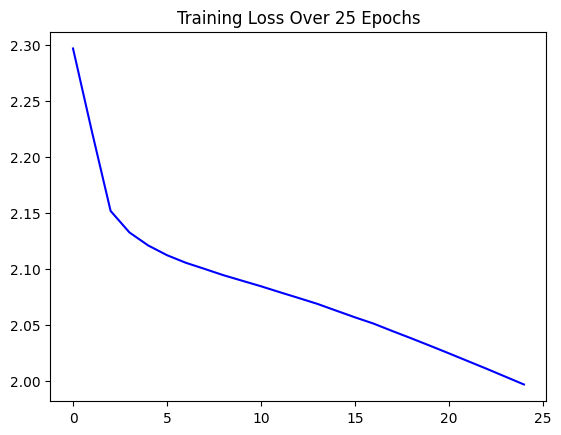

In [17]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

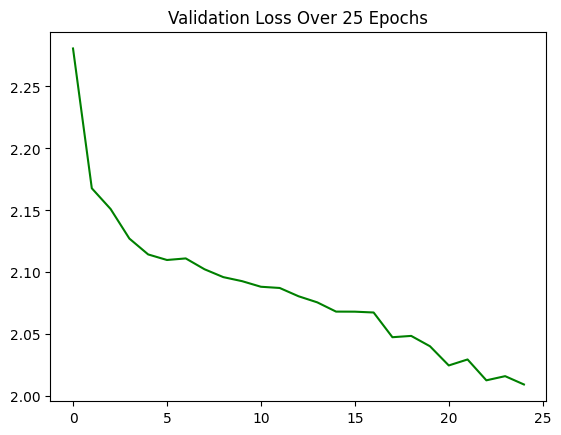

In [18]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

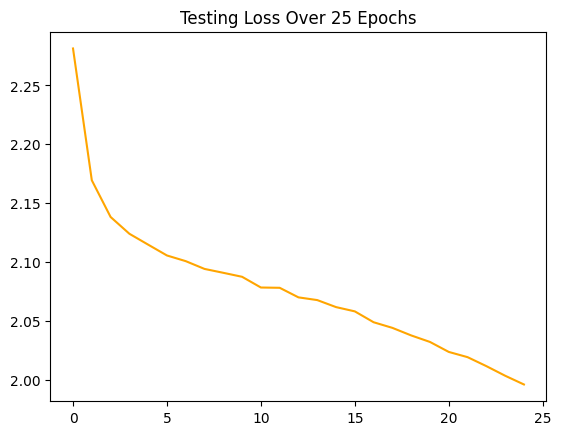

In [19]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

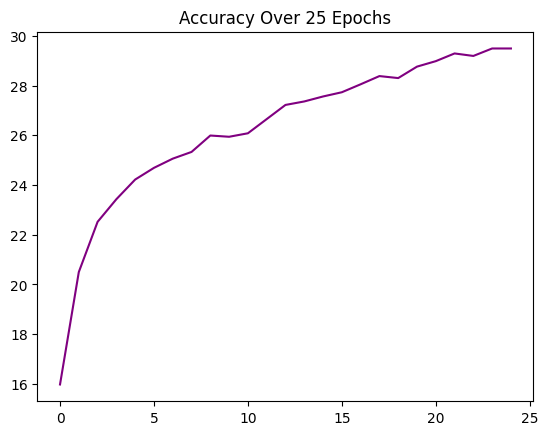

In [20]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Using ReLU() instead of Tanh() activations

In [21]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 64, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        
        #additional convolutional layer 1
        nn.Conv2d(in_channels = 16, out_channels = 64, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        
        #Last additional convolutional layer
        nn.Conv2d(in_channels = 64, out_channels = 120, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 1, stride = 2),

        nn.Flatten(),
        nn.Linear(480, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.810
Validation loss: 1.611
Testing loss: 1.598
Accuracy:  41.349998474121094 

Epoch 2
Training loss: 1.504
Validation loss: 1.399
Testing loss: 1.419
Accuracy:  48.66999816894531 

Epoch 3
Training loss: 1.376
Validation loss: 1.330
Testing loss: 1.374
Accuracy:  50.88999938964844 

Epoch 4
Training loss: 1.279
Validation loss: 1.222
Testing loss: 1.297
Accuracy:  53.459999084472656 

Epoch 5
Training loss: 1.209
Validation loss: 1.112
Testing loss: 1.218
Accuracy:  56.689998626708984 

Epoch 6
Training loss: 1.144
Validation loss: 1.185
Testing loss: 1.309
Accuracy:  54.58000183105469 

Epoch 7
Training loss: 1.081
Validation loss: 0.988
Testing loss: 1.139
Accuracy:  60.09000015258789 

Epoch 8
Training loss: 1.029
Validation loss: 0.953
Testing loss: 1.158
Accuracy:  59.2400016784668 

Epoch 9
Training loss: 0.985
Validation loss: 0.932
Testing loss: 1.124
Accuracy:  60.799999237060

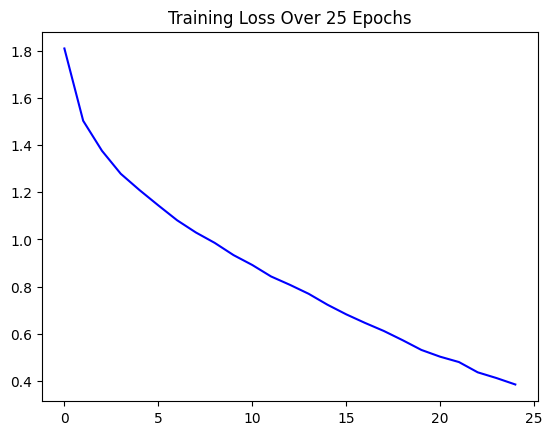

In [22]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

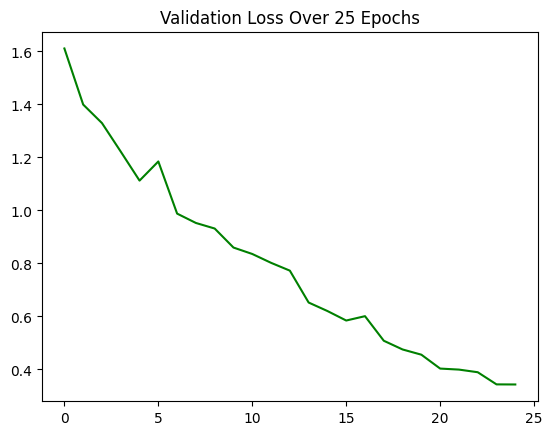

In [23]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

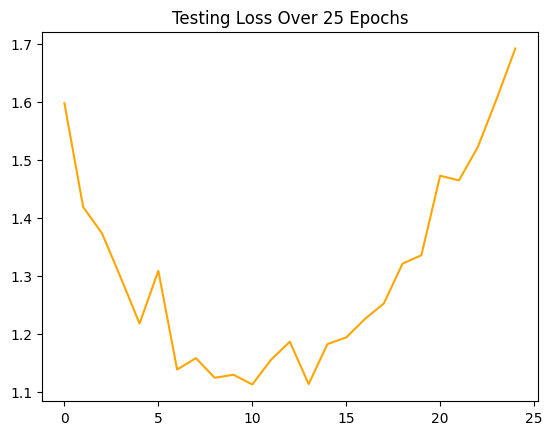

In [24]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

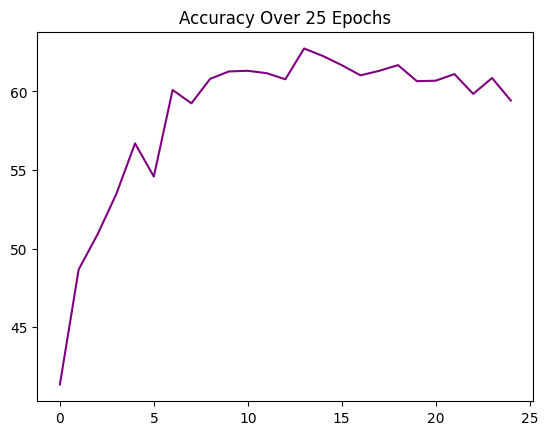

In [25]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Modifying LeNet by multiplying out channels by in channels

In [26]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 64, shuffle = True, num_workers = 2)

#Modifying LeNet by multiplying number of in channels to all other channels
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6*3, kernel_size = 5, stride = 1, padding  = 2),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6*3, out_channels = 16*3, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        
        #additional convolutional layer 1
        nn.Conv2d(in_channels = 16*3, out_channels = 64*3, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        
        #Last additional convolutional layer
        nn.Conv2d(in_channels = 64*3, out_channels = 120*3, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 1, stride = 2),

        nn.Flatten(),
        nn.Linear(480*3, 120*3),
        nn.ReLU(),
        nn.Linear(120*3, 84*3),
        nn.ReLU(),
        nn.Linear(84*3, 10*3)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction


Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.815
Validation loss: 1.491
Testing loss: 1.509
Accuracy:  41.849998474121094 

Epoch 2
Training loss: 1.353
Validation loss: 1.174
Testing loss: 1.239
Accuracy:  55.15999984741211 

Epoch 3
Training loss: 1.156
Validation loss: 1.080
Testing loss: 1.176
Accuracy:  58.95000076293945 

Epoch 4
Training loss: 1.017
Validation loss: 0.904
Testing loss: 1.059
Accuracy:  62.56999969482422 

Epoch 5
Training loss: 0.902
Validation loss: 0.816
Testing loss: 1.045
Accuracy:  63.61000061035156 

Epoch 6
Training loss: 0.778
Validation loss: 0.624
Testing loss: 0.955
Accuracy:  68.30000305175781 

Epoch 7
Training loss: 0.676
Validation loss: 0.537
Testing loss: 0.961
Accuracy:  67.5199966430664 

Epoch 8
Training loss: 0.572
Validation loss: 0.473
Testing loss: 1.029
Accuracy:  67.1500015258789 

Epoch 9
Training loss: 0.476
Validation loss: 0.347
Testing loss: 1.114
Accuracy:  67.05999755859375 

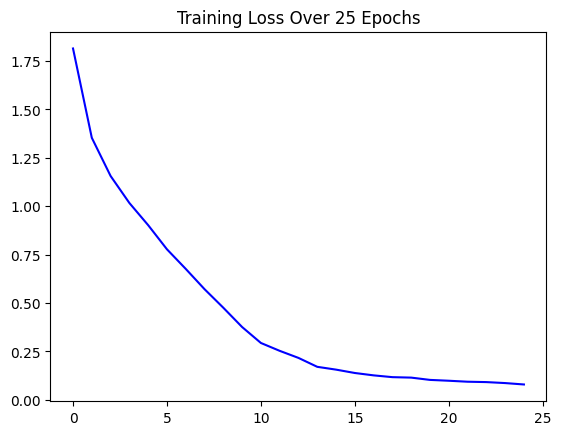

In [27]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

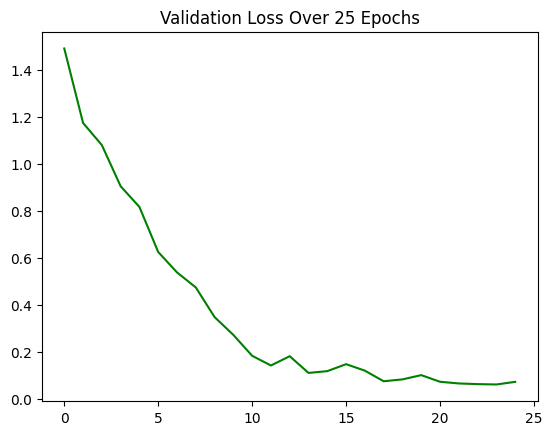

In [28]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

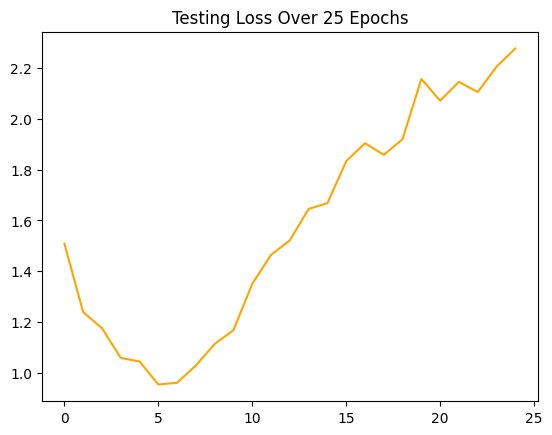

In [29]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

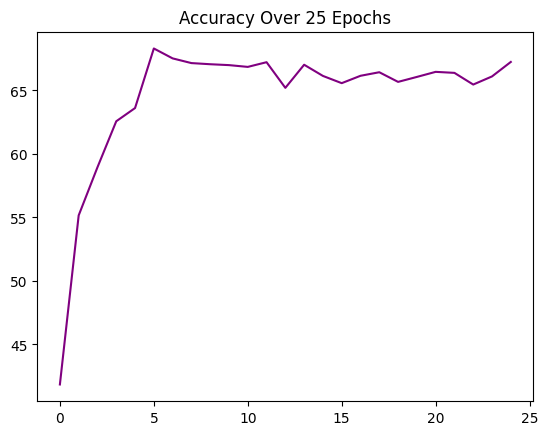

In [30]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()